# Problem statement:
**Hello everyone, Today we are going to perform Exploratory Data analysis on a very huge and popular "PUB-G" Dataset.
This data comes from all match types such as solos, duos, squads and customs. We have to do the univariate, bivariate and multivariate analysis and use Hypothesis, Chi Squared testing for outliers treatment and to come up with some interesting research questions**

# Data Description:
* In a PUBG game, up to 100 players start in each match (matchId).
* Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. 
* In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.
* Here we have around 110k rows and 30 columns.
* Datafields: 
 **DBNOs** - Number of enemy players knocked.<br>
 **assists** - Number of enemy players this player damaged that were killed by teammates.<br>
 **boosts** - Number of boost items used.<br>
 **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.<br>
 **headshotKills** - Number of enemy players killed with headshots.<br>
 **heals** - Number of healing items used.<br>
 **Id** - Player’s Id<br>
 **killPlace** - Ranking in match of number of enemy players killed.<br>
 **killPoints** - Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.<br>
 **killStreaks** - Max number of enemy players killed in a short amount of time.<br> 
 **kills** - Number of enemy players killed.<br>
 **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.<br>
 **matchDuration** - Duration of match in seconds.<br>
 **matchId** - ID to identify matches.<br>
 **matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.<br>
 **rankPoints** - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.<br>
 **revives** - Number of times this player revived teammates.<br>
 **rideDistance** - Total distance traveled in vehicles measured in meters.<br>
 **roadKills** - Number of kills while in a vehicle.<br>
 **swimDistance** - Total distance traveled by swimming measured in meters.<br>
 **teamKills** - Number of times this player killed a teammate.<br>
 **vehicleDestroys** - Number of vehicles destroyed.<br>
 **walkDistance** - Total distance traveled on foot measured in meters.<br>
 **weaponsAcquired** - Number of weapons picked up.<br>
 **winPoints** - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.<br>
 **groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.<br>
 **numGroups** - Number of groups we have data for in the match.<br>
 **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.<br>
 **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [3]:
pubg = pd.read_csv("data.csv")
pubg.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [4]:
pubg.tail()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,4311549,d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,3521011,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,2138826,8237d06ea2c508,13a05023ab7735,f93b1f0defaee5,1,4,53.51,1,0,7,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000
1111741,609836,9beb0064c56445,5cfa1834dc5b11,0406ce4ab7a1bd,5,3,607.40,3,0,3,...,0,713.9,0,8.912,0,0,3713.00,5,1611,1.0000


In [5]:
pubg.shape

(1111742, 30)

In [6]:
pubg.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

# Checking for missing values

In [7]:
#ratio of missing values
pubg.isna().sum()/pubg.shape[0]*100

Unnamed: 0         0.00000
Id                 0.00000
groupId            0.00000
matchId            0.00000
assists            0.00000
boosts             0.00000
damageDealt        0.00000
DBNOs              0.00000
headshotKills      0.00000
heals              0.00000
killPlace          0.00000
killPoints         0.00000
kills              0.00000
killStreaks        0.00000
longestKill        0.00000
matchDuration      0.00000
matchType          0.00000
maxPlace           0.00000
numGroups          0.00000
rankPoints         0.00000
revives            0.00000
rideDistance       0.00000
roadKills          0.00000
swimDistance       0.00000
teamKills          0.00000
vehicleDestroys    0.00000
walkDistance       0.00000
weaponsAcquired    0.00000
winPoints          0.00000
winPlacePerc       0.00009
dtype: float64

In [8]:
pubg['winPlacePerc'].dtypes

dtype('float64')

<AxesSubplot:xlabel='winPlacePerc'>

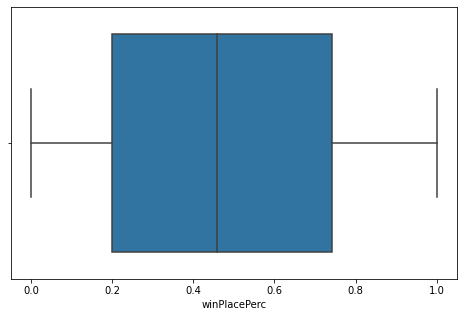

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(pubg['winPlacePerc'],data=pubg)

In [10]:
#Missing value treatment
pubg['winPlacePerc']=pubg['winPlacePerc'].fillna(pubg['winPlacePerc'].mean())

In [11]:
#Checking for missing values again for treatment
pubg.isna().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

# Observation:
* Using isna function it is observed that we have only one missing value in win place percentage attribute.
* We can confirm that boxplot shows there is no outlier in the dataset. So we can impute missing values with mean.
* It is filled with the mean and fillna function
* Again checking it is observed that we don't have any missing values.

# Checking categorical and numerical features in the column.


In [12]:
categorical = pubg.select_dtypes(include=[np.object])
print("Number of categorical values:",categorical.shape[1])
numerical = pubg.select_dtypes(include=[np.float64,np.int64])
print("Number of numerical values:",numerical.shape[1])

Number of categorical values: 4
Number of numerical values: 26


In [13]:
pubg.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073770e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [14]:
pubg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [15]:
pubg['matchType'].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133854
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

In [16]:
#We have some irregularities in data so we have to fix them.
pubg['matchType'].replace(['squad-fpp','duo-fpp','squad','solo-fpp','duo','solo','normal-squad-fpp','crashfpp','normal-duo-fpp','flaretpp','normal-solo-fpp','flarefpp','normal-squad','crashtpp','normal-solo','normal-duo'],['squad','duo','squad','solo','duo','solo','normal','custom','normal','custom','normal','custom','normal','custom','normal','normal'],inplace=True)

In [17]:
pubg['matchType'].value_counts()

squad     595354
duo       327966
solo      179533
normal      6409
custom      2480
Name: matchType, dtype: int64

# Univariate analysis

<AxesSubplot:xlabel='matchType', ylabel='count'>

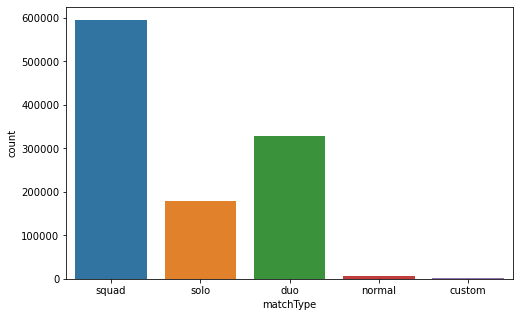

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(pubg['matchType'])

In [19]:
pubg['kills'].value_counts()

0     632149
1     232156
2     118274
3      58026
4      31302
5      16600
6       9429
7       5458
8       3139
9       1934
10      1131
11       713
12       451
13       283
14       199
15       126
16        78
17        61
18        53
19        29
21        27
20        24
22        22
23        17
24        11
26         9
30         5
25         3
40         3
33         3
38         3
27         3
36         2
37         2
39         2
29         2
32         1
47         1
56         1
55         1
53         1
50         1
41         1
44         1
42         1
28         1
35         1
34         1
72         1
Name: kills, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='count'>

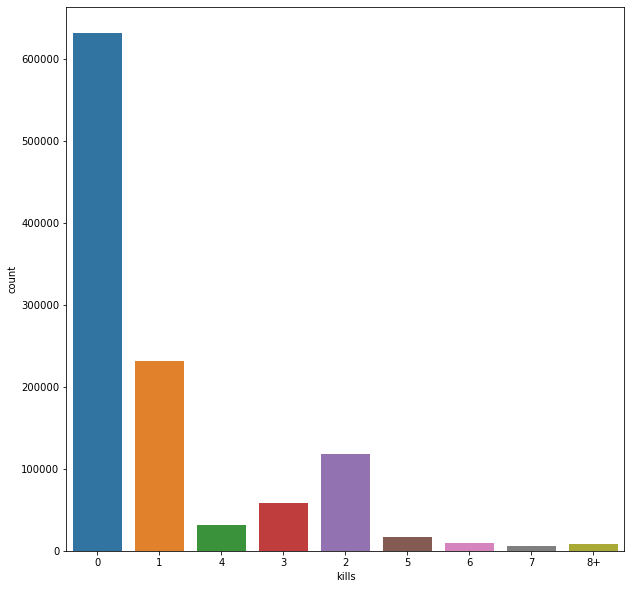

In [20]:
data = pubg.copy()
data.loc[data['kills']>data['kills'].quantile(0.99)]='8+'
plt.figure(figsize=(10,10))
sns.countplot(data['kills'])

<AxesSubplot:xlabel='matchDuration', ylabel='Density'>

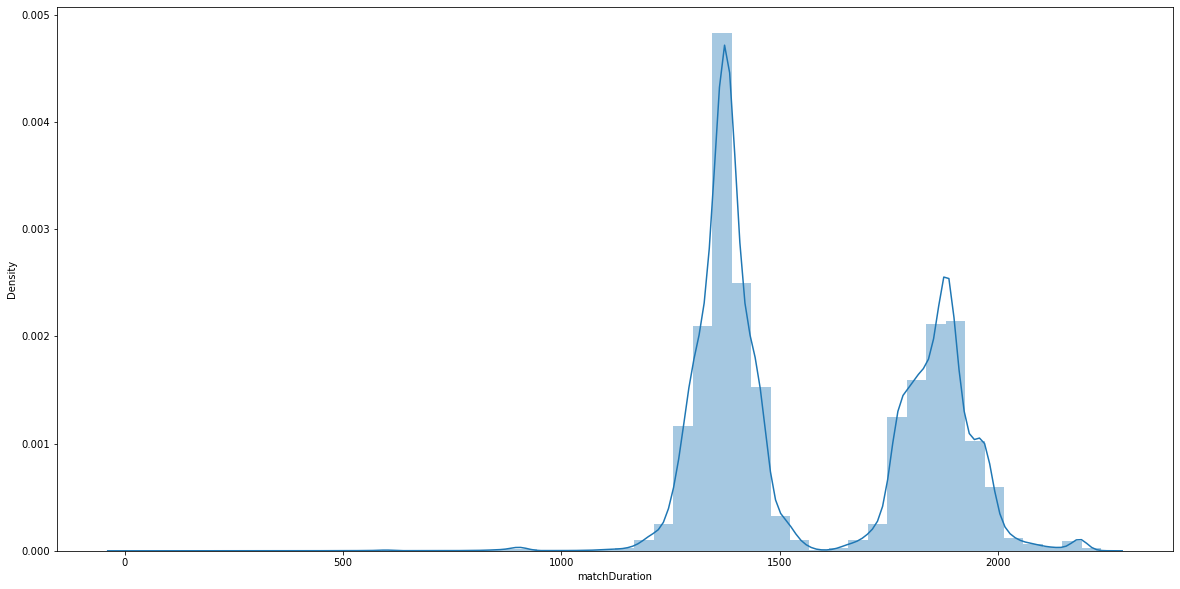

In [21]:
plt.figure(figsize=(20,10))
sns.distplot(pubg['matchDuration'])

<AxesSubplot:xlabel='vehicleDestroys', ylabel='count'>

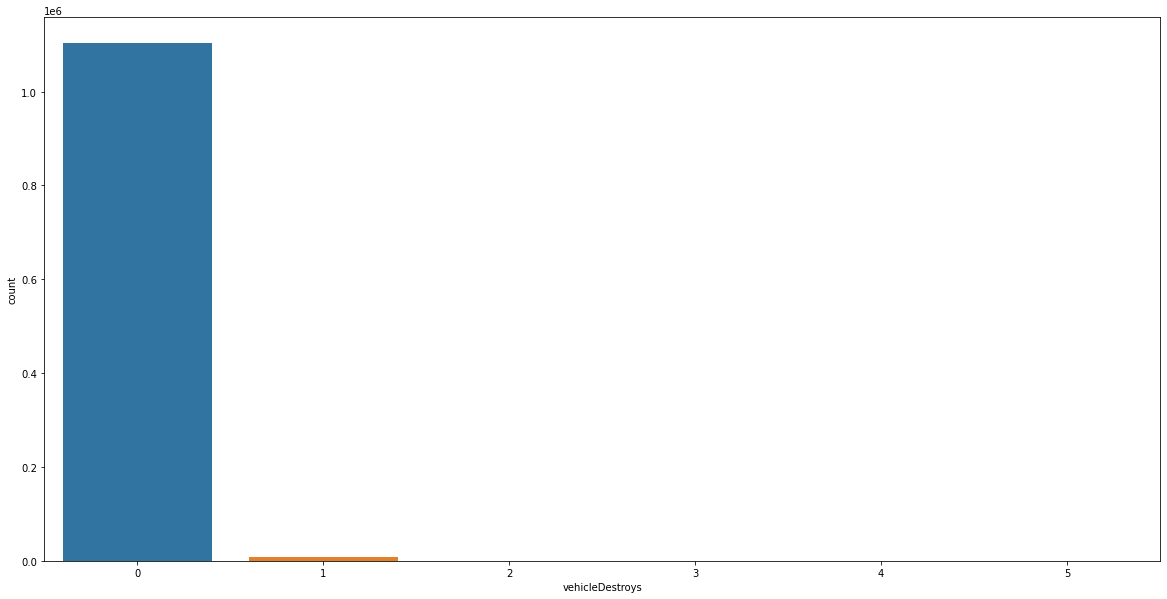

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(pubg['vehicleDestroys'])

<AxesSubplot:>

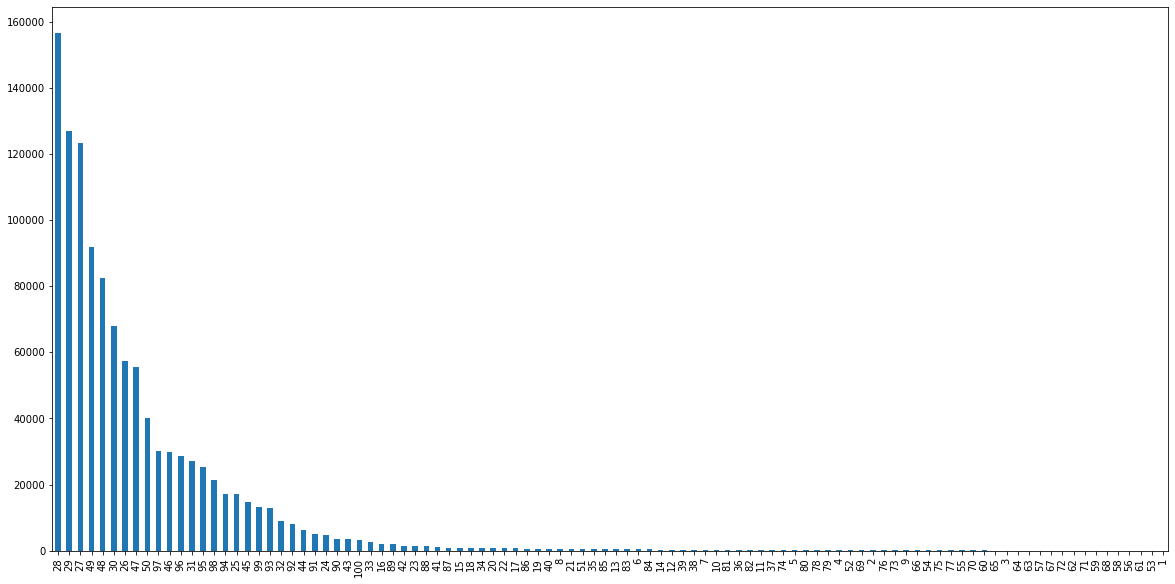

In [23]:
plt.figure(figsize=(20,10))
maxplace = pubg['maxPlace'].value_counts()
maxplace.plot(kind="bar")

In [24]:
pubg.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [25]:
numer = ['Unnamed: 0', 'assists', 'boosts',\
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',\
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',\
       'maxPlace', 'numGroups', 'rankPoints', 'revives',\
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',\
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',\
       'winPlacePerc']

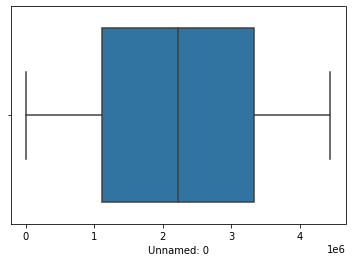

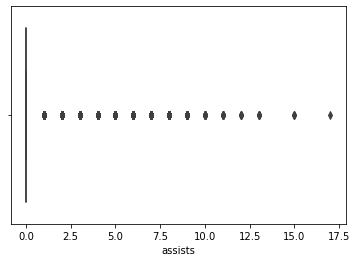

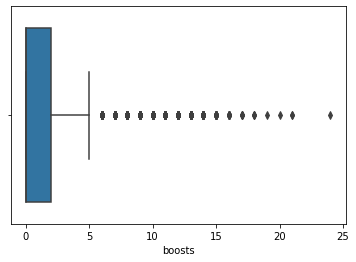

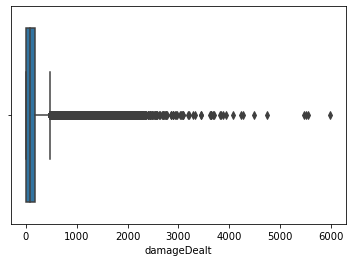

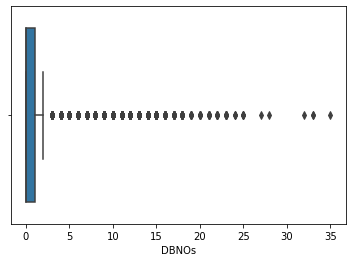

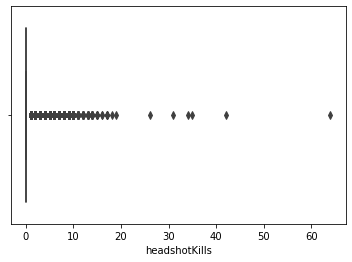

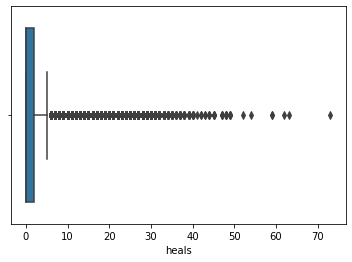

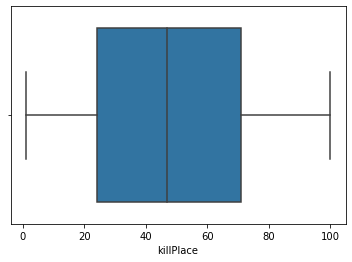

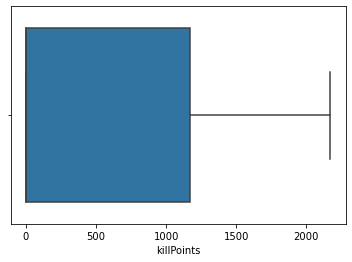

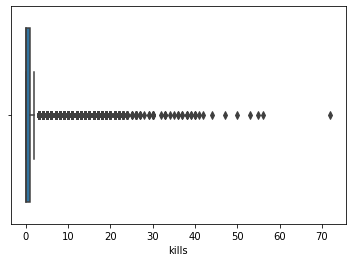

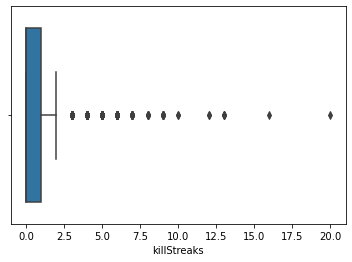

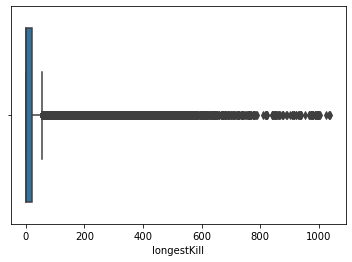

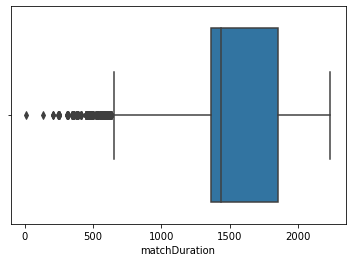

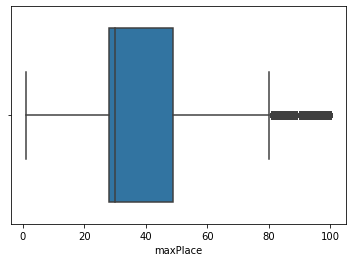

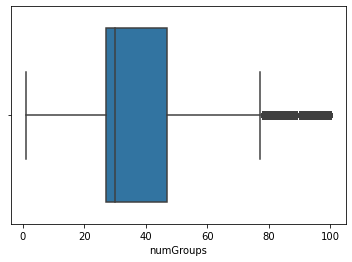

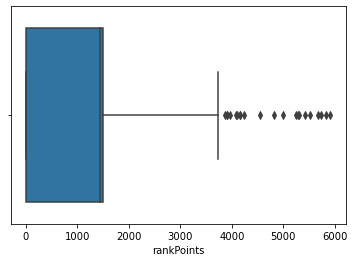

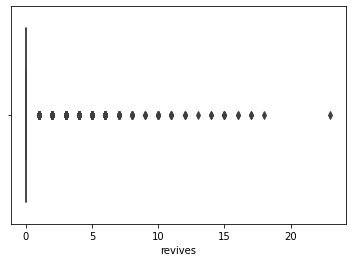

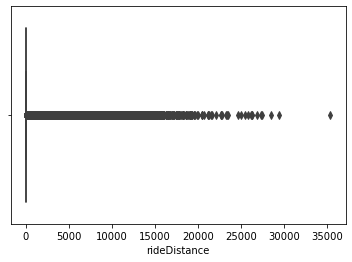

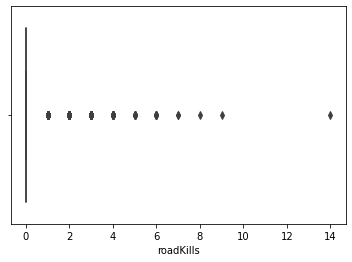

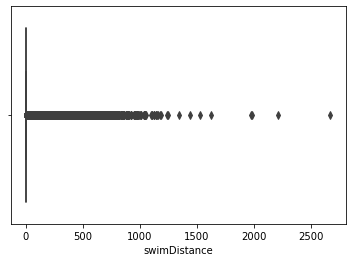

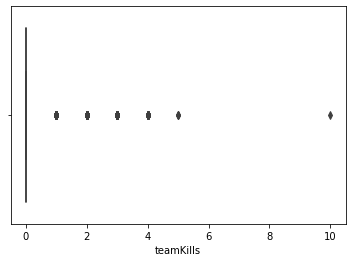

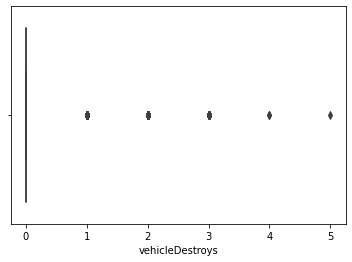

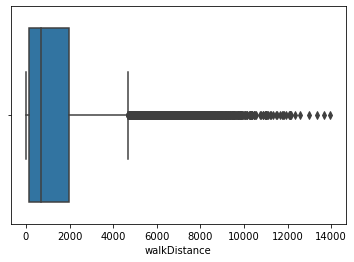

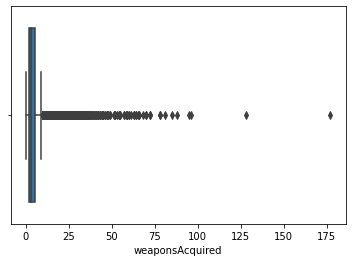

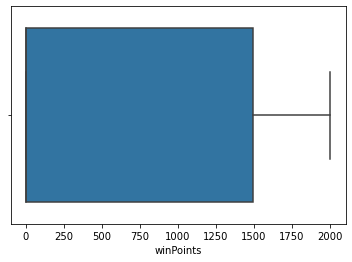

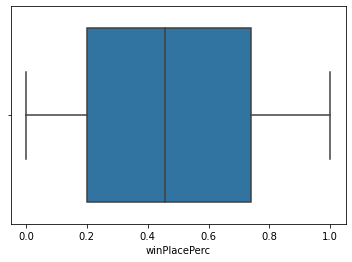

In [35]:
#Boxplot for all numerical columns
for i in numer:
    sns.boxplot(pubg[i])
    plt.show()

In [36]:
q1 = pubg.quantile(0.25)
q3 = pubg.quantile(0.75)
IQR = q3-q1
IQR

Unnamed: 0         2.225514e+06
assists            0.000000e+00
boosts             2.000000e+00
damageDealt        1.859000e+02
DBNOs              1.000000e+00
headshotKills      0.000000e+00
heals              2.000000e+00
killPlace          4.700000e+01
killPoints         1.171000e+03
kills              1.000000e+00
killStreaks        1.000000e+00
longestKill        2.133000e+01
matchDuration      4.840000e+02
maxPlace           2.100000e+01
numGroups          2.000000e+01
rankPoints         1.501000e+03
revives            0.000000e+00
rideDistance       7.927500e-02
roadKills          0.000000e+00
swimDistance       0.000000e+00
teamKills          0.000000e+00
vehicleDestroys    0.000000e+00
walkDistance       1.819800e+03
weaponsAcquired    3.000000e+00
winPoints          1.495000e+03
winPlacePerc       5.407000e-01
dtype: float64

In [37]:
pubg_out = pubg[~((pubg < (q1-1.5*IQR)) | (pubg > (q3+1.5*IQR))).any(axis=1)]

In [38]:
pubg_out.shape

(410888, 30)

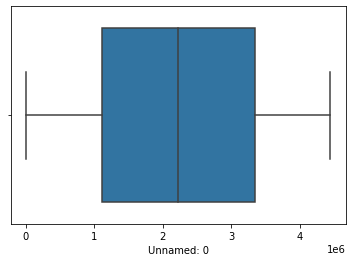

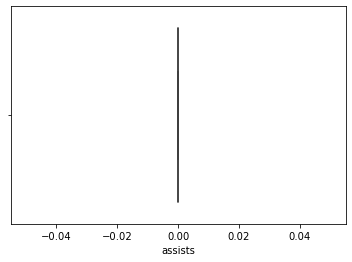

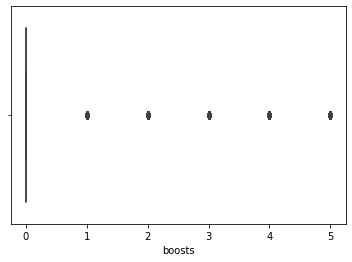

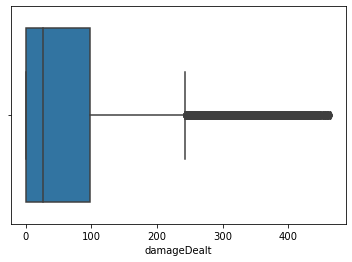

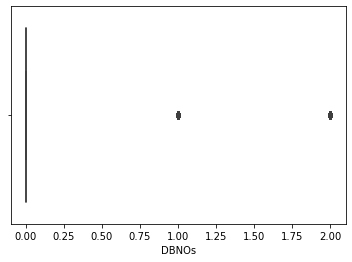

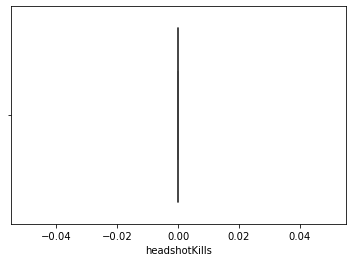

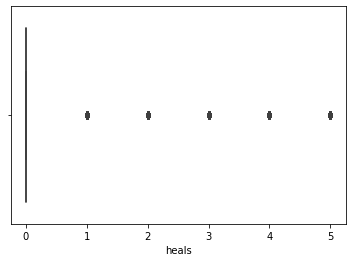

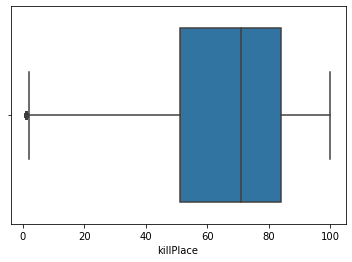

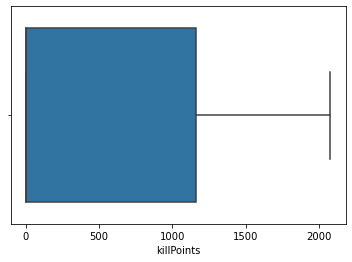

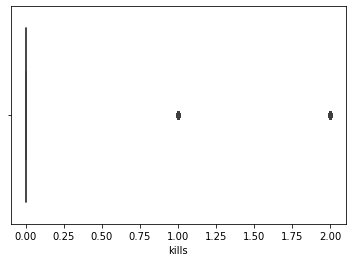

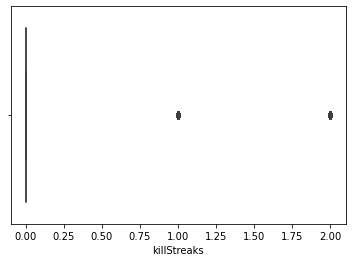

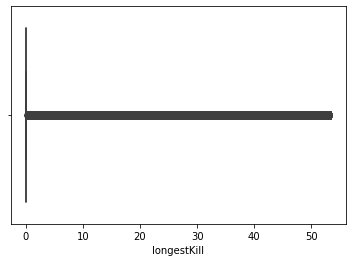

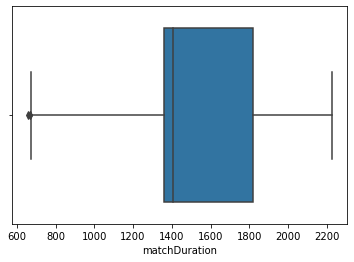

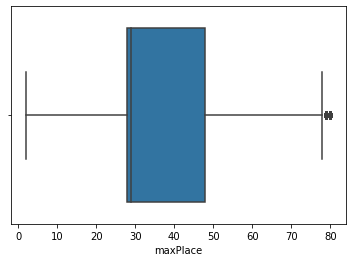

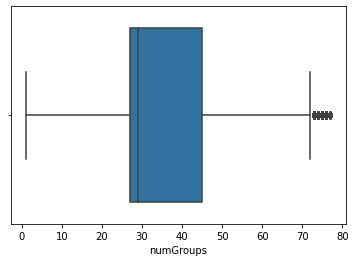

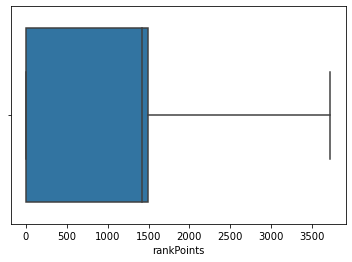

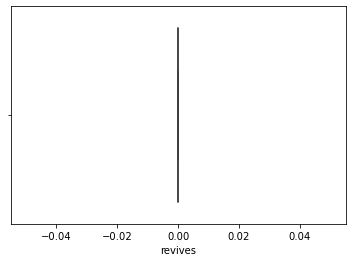

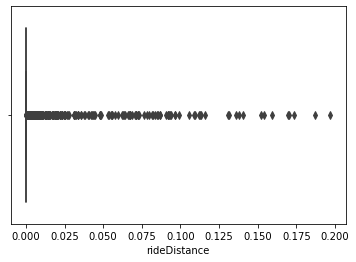

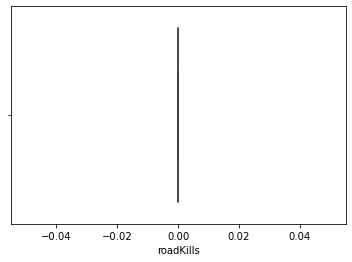

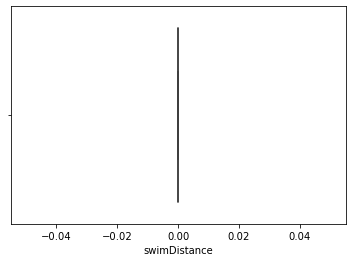

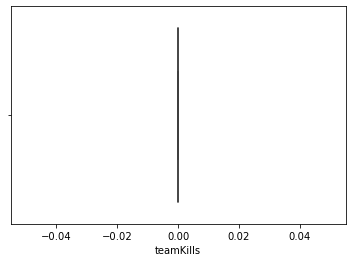

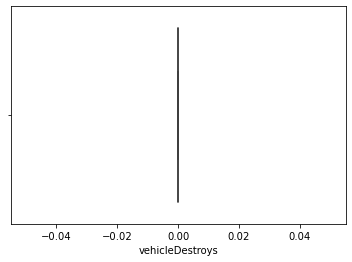

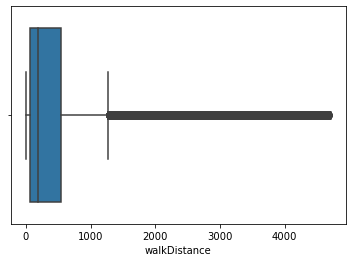

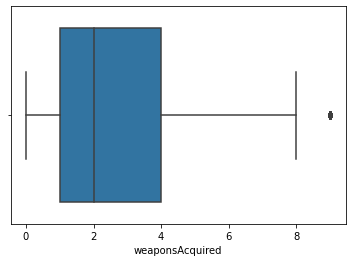

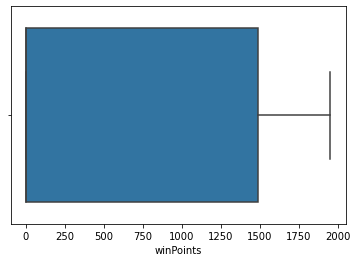

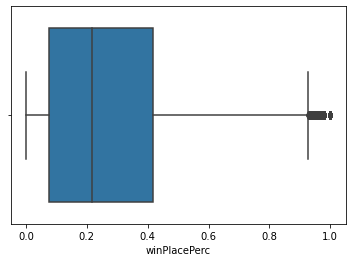

In [41]:
for i in numer:
    sns.boxplot(pubg_out[i])
    plt.show()

<AxesSubplot:xlabel='damageDealt', ylabel='Density'>

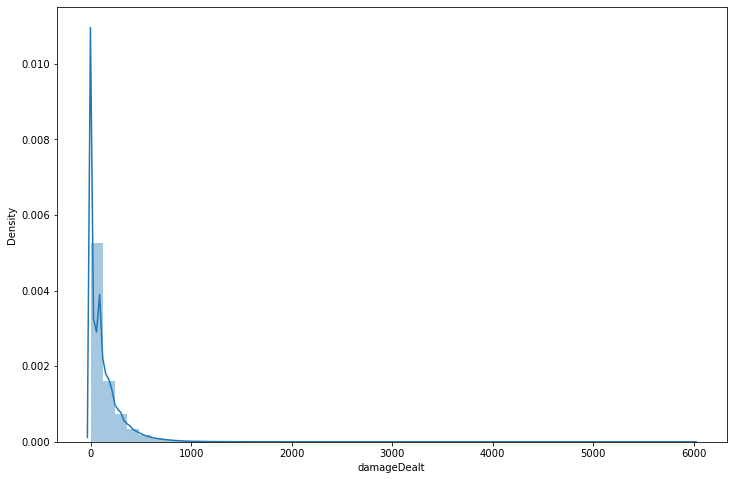

In [43]:
plt.figure(figsize=(12,8))
sns.distplot(pubg['damageDealt'])

# Observation :
* There are 4 Categorical attributes and 26 Numerical attributes.
* From the univariate analysis, It is clear that more number of matches are played with Squad whereas very few matches played in normal and custom.
* Most of the matches ended with 0 kills.
* Very few super talented persons has more than 8 kills.
* Normal plot of Match duration states that many number of matches ends by 1300 seconds.
* Very few of them has involved in destroying vehicles.
* The bar plot of position clearly states that many of them secured 28th position whereas only one person secured 1st position.
* Next we use boxplot for all numeric columns to detect outliers.
* The outliers are detected using IQR function.
* Again plotting we can observe that the outliers are removed from the dataset.
* Damage percentage is very low.

# Bivariate analysis

<Figure size 1080x1440 with 0 Axes>

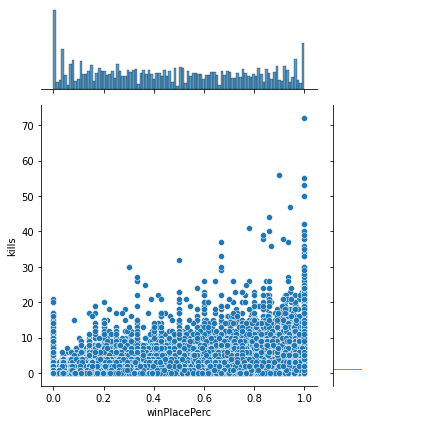

In [53]:
#Jointplot of kills and win place percentage
plt.figure(figsize=(15,20))
sns.jointplot(x='winPlacePerc',y='kills',data=pubg,ratio=3)

<AxesSubplot:xlabel='walkDistance', ylabel='Density'>

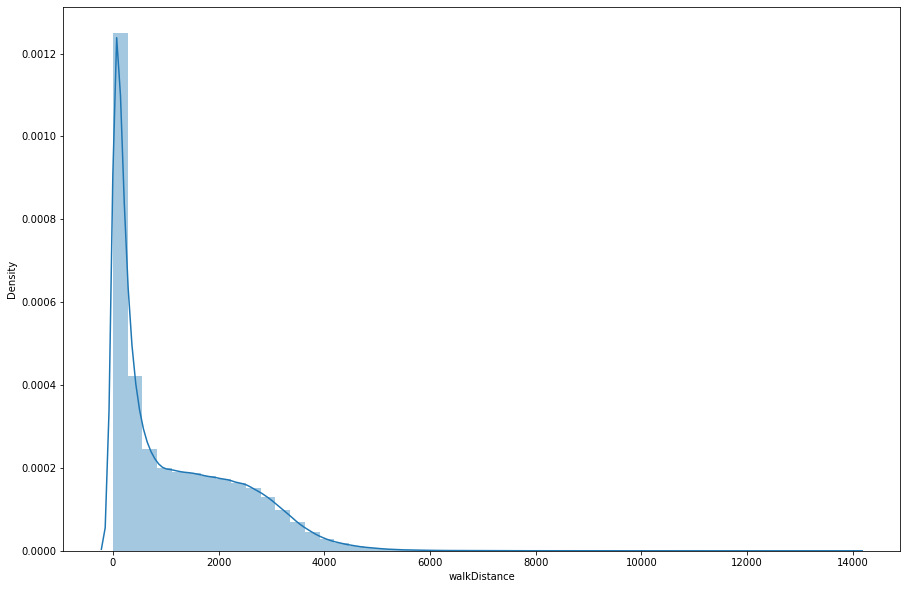

In [48]:
plt.figure(figsize=(15,10))
sns.distplot(pubg['walkDistance'])

<Figure size 1080x720 with 0 Axes>

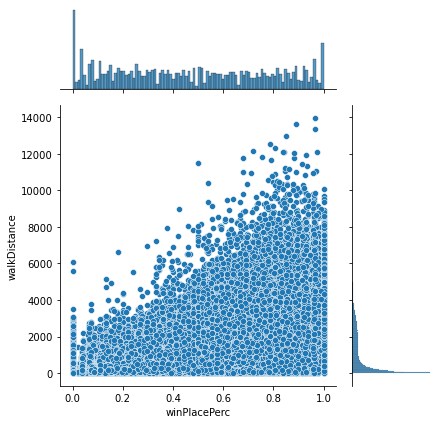

In [52]:
plt.figure(figsize=(15,10))
sns.jointplot(x='winPlacePerc',y='walkDistance',data=pubg,ratio=3)

<Figure size 1080x720 with 0 Axes>

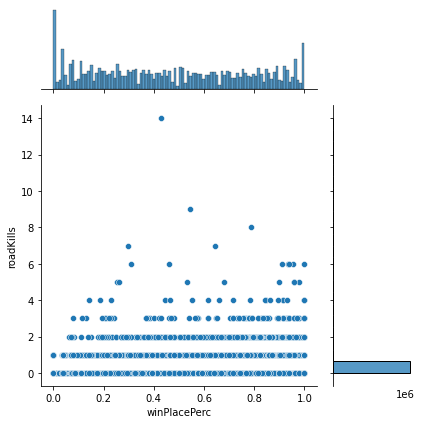

In [54]:
plt.figure(figsize=(15,10))
sns.jointplot(x='winPlacePerc',y='roadKills',data=pubg,ratio=3)

<Figure size 1080x720 with 0 Axes>

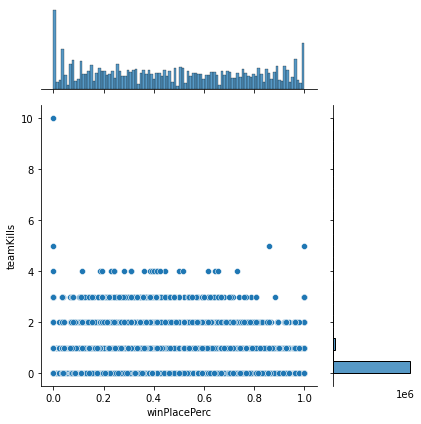

In [55]:
plt.figure(figsize=(15,10))
sns.jointplot(x='winPlacePerc',y='teamKills',data=pubg,ratio=3)

<Figure size 1080x720 with 0 Axes>

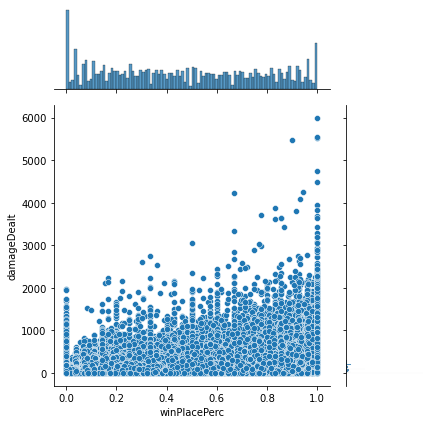

In [56]:
plt.figure(figsize=(15,10))
sns.jointplot(x='winPlacePerc',y='damageDealt',data=pubg,ratio=3)

# Observation:
* The first place secured person has 70 kills.
* Most of them have a walk distance of 8000 meters.
* The percentage of roadkills is less when the win place percentage increases.
* Average of 4 kills per team is involved.
* Those who have secured 1st place has more number of damages to dealt with.